# Bachelor Project \\ Classification of granular material

## Applied Machine Learning to granular materials

At first, the train set will be extracted then different ML algorithms will be tested on the initial dataset. Then the same procedure will be done to a dataset expanded with the functions stocked in the file processing_function.py. For this second part, three different sizes of sample are considered the large sample(12 d0), the medium sample (6d0), and the small sample (3d0).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from processing_function import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import *
from sympy.physics.wigner import wigner_3j
from extract_L_M_S_data import *
import os
import pickle
import time
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Initial dataset

Machin learning tests on the initial dataset composed of x,y,z, and r

### Preview of the Data

In [2]:
preview, info = extract_data_3D('C:\\Users\\arnau\\OneDrive\\Documents\\Bachelor semestre 6\\Projet de Bachelor\\3D\\sample_students_ML\\box_0.036000000000000004\\seed_278\\pressure_5.0\\confined_5.0_MPa.data')
os.path.exists('C:\\Users\\arnau\\OneDrive\\Documents\\Bachelor semestre 6\\Projet de Bachelor\\3D\\sample_students_ML\\box_0.036000000000000004\\seed_278\\pressure_5.0\\confined_5.0_MPa.data')
print(preview)
print(info)
preview = get_list(preview)

                            x                      y         z       r     n
1445    -0.014221842585900786  -0.016816161192669054 -0.017015  0.0035  1445
1272    -0.008879357739675775  -0.016614927790910436 -0.016742  0.0035  1272
1486    -0.005622342931219519  -0.016185751872231362 -0.015551  0.0035  1486
1083  -0.00033117832786325885   -0.01739245888568254 -0.016611  0.0035  1083
136      0.009439856633189336  -0.016026126366552103 -0.016017  0.0035   136
...                       ...                    ...       ...     ...   ...
672     0.0004571014874234487   0.016764103837591603  0.015534  0.0025   672
1673    0.0033259323974348114   0.016851715158018293  0.016382  0.0035  1673
1437     0.009172764119108882   0.016696749979084137  0.016875  0.0025  1437
1070     0.012685568225314458   0.015785002414467498   0.01596  0.0025  1070
1156     0.015224752897050928    0.01562389969608615  0.015908  0.0025  1156

[1840 rows x 5 columns]
{'n_atoms': 1840, 'x_low': -0.017458303644835083, '

### Show the figure

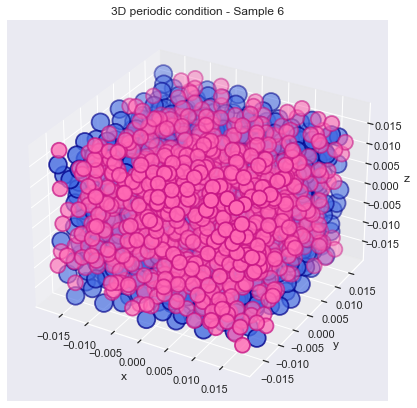

In [3]:
x1=[]
y1=[]
z1=[]
x2=[]
y2=[]
z2=[]

for i in range (len(preview)):
    if (preview[i,3] == 0.0035):
        x1 = np.append(x1,preview[i,0])
        y1 = np.append(y1,preview[i,1])
        z1 = np.append(z1,preview[i,2])
    else:
        x2 = np.append(x2,preview[i,0])
        y2 = np.append(y2,preview[i,1])
        z2 = np.append(z2,preview[i,2])

sns.set(style = "darkgrid")

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax.scatter3D(x1, y1, z1,s = 315, c = 'royalblue', linewidths = 1.8, edgecolor = 'darkblue')
ax.scatter3D(x2, y2, z2,s = 225, c = 'hotpink', linewidths = 1.8, edgecolor = 'mediumvioletred')


plt.title('3D periodic condition - Sample 6')
plt.show()

## Initial dataset - DBscan

### Extract all Data

Find all the sample that don't exist in the file

In [4]:
no_path =[]

for i in range (999):
    if(False == os.path.exists("C:\\Users\\arnau\\OneDrive\\Documents\\Bachelor semestre 6\\Projet de Bachelor\\3D\\sample_students_ML\\box_0.036000000000000004\\seed_{}\\pressure_5.0\\confined_5.0_MPa.data".format(i))):
        no_path = np.append(no_path, i)
        
print(no_path)

[100. 200. 206. 211. 213. 227. 237. 245. 272. 275. 296. 303. 319. 325.
 332. 336. 342. 349. 352. 357. 358. 379. 382. 383. 385. 386. 387. 391.
 397. 403. 408. 411. 416. 431. 433. 440. 447. 452. 453. 459. 461. 475.
 484. 493. 505. 516. 523. 533. 542. 548. 554. 557. 567. 575. 585. 589.
 594. 609. 610. 612. 619. 634. 641. 654. 657. 661. 665. 672. 676. 681.
 689. 694. 704. 710. 712. 721. 726. 729. 735. 739. 743. 751. 762. 767.
 768. 791. 792. 797. 798. 800. 805. 806. 816. 823. 839. 849. 854. 858.
 870. 872. 875. 882. 885. 893. 900. 915. 917. 920. 928. 934. 935. 949.
 960. 961. 985. 989. 998.]


Extract the data calculated on the cluster

In [5]:
init_data = pickle.load( open( "xyzr", "rb" ) )
n_atom_max = pickle.load( open( "n_atom_max", "rb" ) )

In [6]:
print(n_atom_max)

1879


In [7]:
print(init_data["seed_1"])

[[-0.015016001105325676 -0.016354383804705216 -0.017446713540884222
  0.0035 696]
 [-0.0060314419060799205 -0.016426456262023176 -0.016808943230676214
  0.0025 441]
 [-0.0030709635879283457 -0.015328961793869656 -0.01654193957266851
  0.0035 1098]
 ...
 [0.008067957195824482 0.01600095908152477 0.015582565847754441 0.0025
  937]
 [0.012767121625040739 0.016470655286861292 0.016587426838744597 0.0025 1]
 [0.015110036100353606 0.01563646885848111 0.016660543972476956 0.0025
  1691]]


## DB scan

### Data adaptation for DB scan

In [8]:
DB_init = pickle.load( open( "DB_init", "rb" ) )

In [9]:
print(len(DB_init))

197


### DB scan test

In this part the goal is to find the rigth number of classes.

In [10]:
X_DB_init = DB_init

alone_y_initial =[]
nclass_y_initial =[]
eps_x_initial = []

for j in range (50):
    clustering = DBSCAN(eps=0.655+j/1000, min_samples=2).fit(X_DB_init) #eps = research radius, min_samples = min number of similar sample
    alone = 0
    dif = 0
    for i in range (len(clustering.labels_)):
        if (clustering.labels_[i] == -1):
            alone = alone +1
        elif(clustering.labels_[i] > dif ):  
            dif = clustering.labels_[i] + 1
        else:
            pass
    alone_y_initial = np.append(alone_y_initial, alone)
    nclass_y_initial = np.append(nclass_y_initial, dif)
    eps_x_initial = np.append(eps_x_initial, 0.655+j/1000)


In [11]:
#lim
lim_init1 = np.ones(len(eps_x_initial))*0.683
lim_init2 = np.ones(len(eps_x_initial))*4

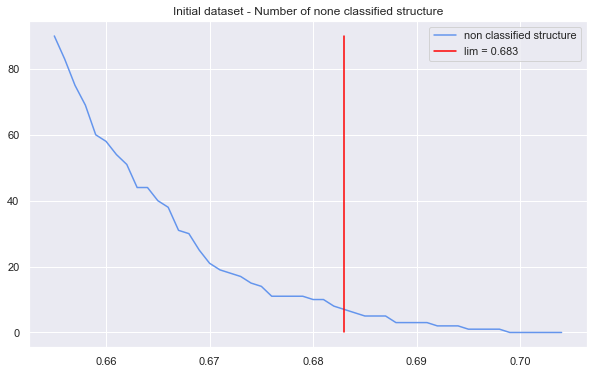

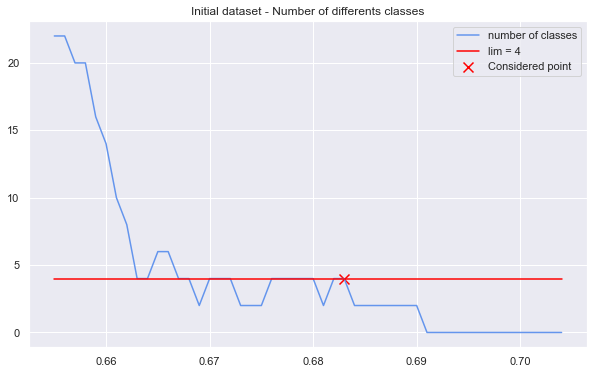

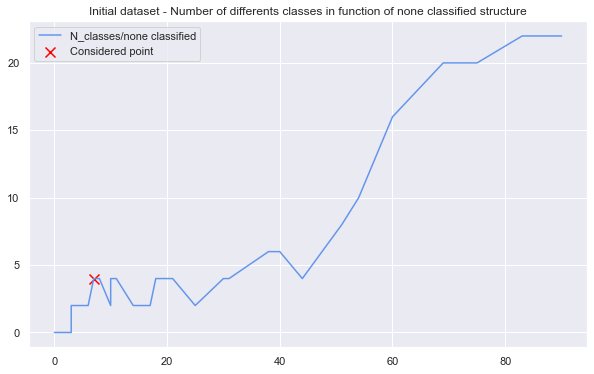

In [12]:
fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_initial,alone_y_initial, label='non classified structure', c = 'cornflowerblue')
plt.plot(lim_init1,alone_y_initial, label='lim = 0.683', c = 'red')
plt.title('Initial dataset - Number of none classified structure')
plt.legend()
fig.savefig("Init_none.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_initial,nclass_y_initial, label='number of classes', c = 'cornflowerblue')
plt.plot(eps_x_initial,lim_init2, label='lim = 4', c = 'red')
plt.scatter(0.683,4, s = 100, marker = 'x', label='Considered point', c = 'red')
plt.title('Initial dataset - Number of differents classes')
fig.savefig("Init_number.png")
plt.legend()
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(alone_y_initial,nclass_y_initial, label = 'N_classes/none classified', c='cornflowerblue')
plt.title('Initial dataset - Number of differents classes in function of none classified structure')
plt.scatter(7,4, s = 100, marker = 'x', label='Considered point', c = 'red')
fig.savefig("Init_bis.png")
plt.legend()
plt.show()

In [13]:
clustering = DBSCAN(eps=0.683, min_samples=2).fit(X_DB_init) #eps = research radius, min_samples = min number of similar sample
print(clustering.labels_)#eps=0.6686

#Number of non classified structure and number o different crystalline structure
alone = 0
dif = 0
for i in range (len(clustering.labels_)):
    if (clustering.labels_[i] == -1):
        alone = alone +1
    elif(clustering.labels_[i] > dif ):  
        dif = clustering.labels_[i] + 1
    else:
        pass

print('There is',alone, 'non classified structure')
print('there is', dif, 'different crystaline structure')

[ 0  0 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  2  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  3  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  2  3  0  0]
There is 7 non classified structure
there is 4 different crystaline structure


In [14]:
print(len(clustering.labels_))

197


## K-Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
X_kmeans_init = DB_init
kmeans = KMeans(n_clusters=3, random_state=0, n_init =100).fit(X_kmeans_init)
kmeans.labels_

array([2, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 2, 1,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 2, 0,
       2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2,
       1, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 0, 0, 1, 0])

# Expanded dataset

The initial dataset hasn't enough value, an extended data calculated on an EPFL cluster with the processing_function.py formula are so employed for the following machine learning algorithm

# Large sample - 12d0

## DBscan

### Extract all data

In [17]:
DB_trainset = pickle.load( open( "DB_extanded", "rb" ) )

In [18]:
print(DB_trainset[1,:17])

[ 6.00000000e+00  7.17066819e+00  6.12367745e-07  1.24088319e-01
  4.08745139e-01 -6.75451810e-02 -2.70654723e-02  4.68726917e+00
  4.68726804e+00  4.68717479e+00  8.62012463e-02  1.75974605e-01
  6.63262780e-01 -1.23290472e-01 -4.69340184e-01  2.33100838e+06
  7.00000000e+00]


### DBscan test

In this part the goal is to find the rigth number of classes.

In [19]:
X_DB_fin = DB_trainset
print(len(X_DB_fin))

alone_y_extanded =[]
nclass_y_extanded =[]
eps_x_extanded = []

for j in range (150):
    clustering_fin = DBSCAN(eps=31000000+j*10000, min_samples=2).fit(X_DB_fin) #eps = research radius, min_samples = min number of similar sample
    alone = 0
    dif = 0
    for i in range (len(clustering_fin.labels_)):
        if (clustering_fin.labels_[i] == -1):
            alone = alone +1
        elif(clustering_fin.labels_[i] > dif ):  
            dif = clustering_fin.labels_[i]
        else:
            pass
    alone_y_extanded = np.append(alone_y_extanded, alone)
    nclass_y_extanded = np.append(nclass_y_extanded, dif +1)
    eps_x_extanded = np.append(eps_x_extanded, 31000000+j*10000)

199


In [20]:
lim_big1 = np.ones(len(eps_x_extanded))*31530000
lim_big2 = np.ones(len(eps_x_extanded))*10

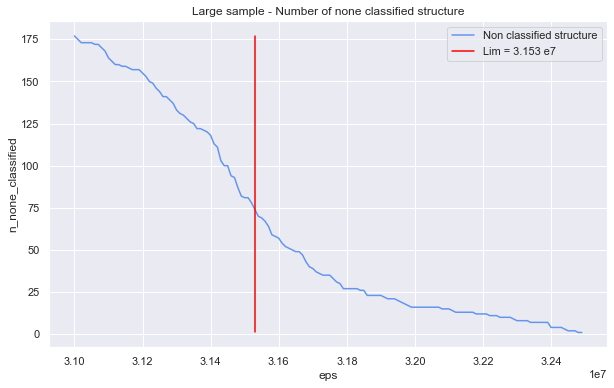

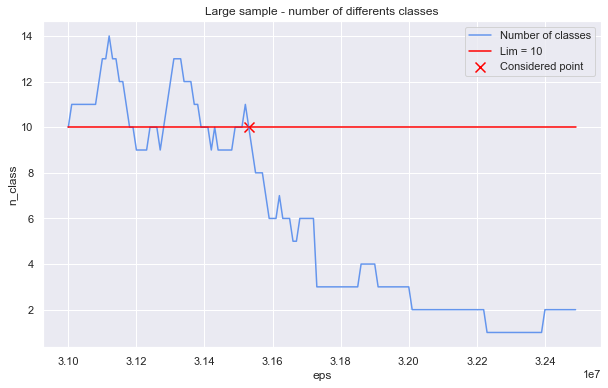

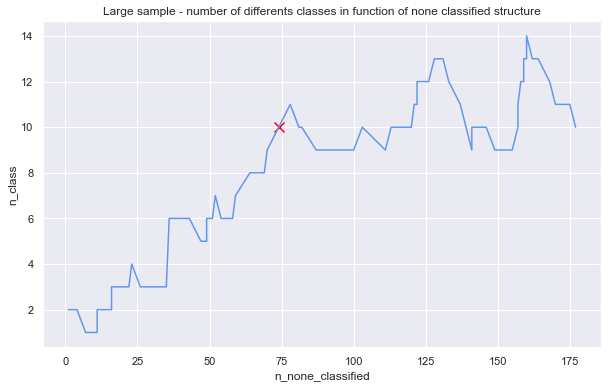

In [21]:
fig =plt.figure(figsize = (10,6))
plt.plot(eps_x_extanded,alone_y_extanded, label='Non classified structure', c = 'cornflowerblue')
plt.plot(lim_big1,alone_y_extanded, label='Lim = 3.153 e7', c = 'red')
plt.title('Large sample - Number of none classified structure')
plt.xlabel('eps')
plt.ylabel('n_none_classified')
plt.legend()
fig.savefig("Big_none.png")
plt.show()

fig =plt.figure(figsize = (10,6))
plt.plot(eps_x_extanded,nclass_y_extanded, label='Number of classes',  c = 'cornflowerblue')
plt.plot(eps_x_extanded,lim_big2, label='Lim = 10', c = 'red')
plt.scatter(31530000,10, s = 100, marker = 'x', label='Considered point', c = 'red')
plt.title('Large sample - number of differents classes')
plt.xlabel('eps')
plt.ylabel('n_class')
plt.legend()
fig.savefig("Big_number.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(alone_y_extanded,nclass_y_extanded,label = 'N_classes/none classified' , c = 'cornflowerblue')
plt.title('Large sample - number of differents classes in function of none classified structure')
plt.scatter(74,10, s = 100, marker = 'x', label='Considered point', c = 'red')
plt.xlabel('n_none_classified')
plt.ylabel('n_class')
fig.savefig("Big_bis.png")
plt.show()

In [22]:
clustering_fin = DBSCAN(eps=31530000, min_samples=2).fit(X_DB_fin) #eps = research radius, min_samples = min number of similar sample
print(clustering_fin.labels_)

#Number of non classified structure and number o different crystalline structure
alone = 0
dif = 0
for i in range (len(clustering_fin.labels_)):
    if (clustering_fin.labels_[i] == -1):
        alone = alone +1
    elif(clustering_fin.labels_[i] > dif ):  
        dif = clustering_fin.labels_[i]
    else:
        pass

print('There is',alone, 'non classified structure')
print('there is', dif + 1, 'different crystaline structure')

[ 0 -1 -1 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0
  0  1  2 -1 -1  2 -1  3 -1  0  0 -1  0  1 -1  0  0 -1  0 -1 -1  0  0  0
 -1  0  0 -1  4  0 -1 -1  0 -1  0 -1 -1  0  0 -1  0  0  0  0  5 -1  0  0
  6  0 -1  0 -1 -1  1  0  0 -1  0 -1 -1  0 -1 -1  0  0 -1  0  3 -1 -1  0
  0 -1  0  0  1  0 -1  0  0 -1  0 -1  0  5  0  7 -1  0 -1  0  0  0 -1  8
  0  0 -1  0  0  0  0  0 -1  1  0  0  4  0 -1 -1  0  0  0  0  0  0 -1  0
  7  0 -1 -1 -1  0  0  0 -1 -1 -1  0 -1  0 -1 -1 -1  0 -1 -1  0  8  0 -1
 -1  9 -1  0 -1  0 -1 -1  9  0  0 -1 -1  0  0  0 -1  0  0  0  0  0 -1  0
  0  5 -1  0 -1  6 -1]
There is 74 non classified structure
there is 10 different crystaline structure


## K-Means

In [23]:
X_kmeans_large = DB_trainset
kmeans_large = KMeans(n_clusters=10, random_state=0, n_init =100).fit(X_kmeans_large)
kmeans_large.labels_

array([2, 2, 9, 4, 7, 1, 5, 5, 3, 6, 1, 8, 8, 1, 7, 6, 1, 5, 9, 5, 2, 3,
       2, 2, 2, 1, 0, 8, 4, 0, 2, 2, 0, 8, 8, 3, 0, 3, 5, 7, 6, 3, 0, 7,
       0, 6, 5, 0, 8, 5, 7, 3, 1, 0, 1, 1, 6, 2, 2, 8, 0, 0, 0, 3, 7, 8,
       2, 2, 9, 9, 6, 0, 1, 8, 2, 8, 9, 4, 3, 5, 7, 2, 8, 9, 3, 0, 4, 9,
       8, 0, 4, 5, 2, 3, 4, 2, 0, 8, 0, 7, 3, 0, 1, 1, 1, 6, 7, 2, 5, 4,
       8, 9, 3, 5, 1, 7, 2, 2, 2, 9, 5, 6, 3, 0, 0, 5, 0, 8, 3, 3, 5, 8,
       3, 2, 6, 1, 2, 1, 5, 8, 0, 8, 0, 1, 9, 0, 4, 8, 2, 2, 0, 8, 2, 3,
       1, 0, 9, 0, 7, 9, 3, 6, 5, 3, 0, 3, 3, 0, 3, 8, 0, 2, 4, 0, 2, 9,
       6, 8, 8, 9, 1, 6, 5, 5, 3, 0, 6, 0, 7, 2, 1, 1, 0, 3, 4, 7, 3, 2,
       3])

In [24]:
print(len(kmeans_large.labels_))

199


## Comparison of DBscan and K-Means class repartition

### number of each class

In [25]:
DB_tot = get_repartition_24_DB(clustering_fin.labels_)
KM_tot = get_repartition_24_KM(kmeans_large.labels_)
DB_tot = class_adapt(DB_tot)
KM_tot = class_adapt(KM_tot )

In [26]:
x1_large=[1,2,3,4,5,6,7,8,9,10]
x2_large=['no class','1','2','3','4','5','6','7','8','9','10']

[ 74. 103.   5.   2.   2.   2.   3.   2.   2.   2.   2.]


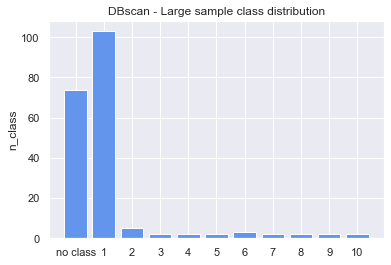

[33. 20. 29. 26. 10. 18. 13. 13. 23. 14.]


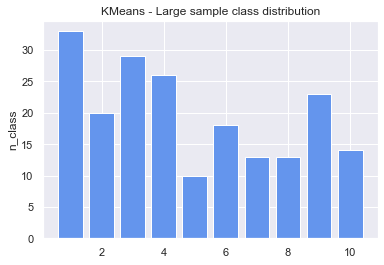

In [27]:
print(DB_tot)
fig = plt.figure()
plt.title('DBscan - Large sample class distribution')
plt.bar(x2_large,DB_tot, color=('cornflowerblue'))

plt.ylabel('n_class')
fig.savefig("DBscan_large_bar.png")
plt.show()

print(KM_tot)
fig = plt.figure()
plt.title('KMeans - Large sample class distribution')
plt.bar(x1_large,KM_tot, color=('cornflowerblue'))
plt.ylabel('n_class')
fig.savefig("Kmeans_large_bar.png")
plt.show()

# Medium sample

### DBscan test

In this part the goal is to find the rigth number of classes.

In [28]:
DB_cut_list = pickle.load( open( "DB_cut_list", "rb" ) )

In [29]:
X_cut = DB_cut_list.transpose()
print(len(X_cut))

800


In [30]:
alone_y_cut =[]
nclass_y_cut =[]
eps_x_cut = []

for j in range (200):
    clustering_cut = DBSCAN(eps=10000000+j*5000, min_samples=2).fit(X_cut) #eps = research radius, min_samples = min number of similar sample
    alone_cut = 0
    dif_cut = 0
    for i in range (len(clustering_cut.labels_)):
        if (clustering_cut.labels_[i] == -1):
            alone_cut = alone_cut +1
        elif(clustering_cut.labels_[i] > dif_cut ):  
            dif_cut = clustering_cut.labels_[i]
        else:
            pass
    alone_y_cut = np.append(alone_y_cut, alone_cut)
    nclass_y_cut = np.append(nclass_y_cut, dif_cut +1)
    eps_x_cut = np.append(eps_x_cut, 10000000+j*5000)

In [31]:
lim_med1 = np.ones(len(eps_x_cut))*10572000
lim_med2 = np.ones(len(eps_x_cut))*18

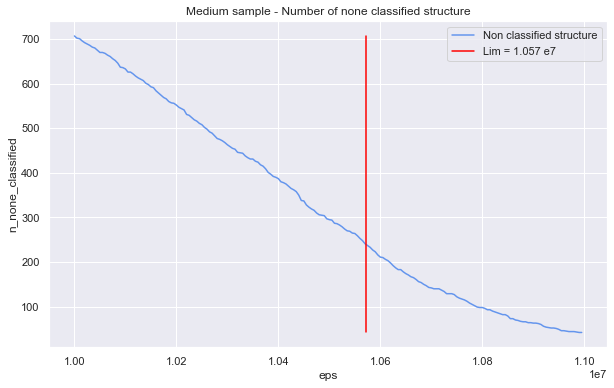

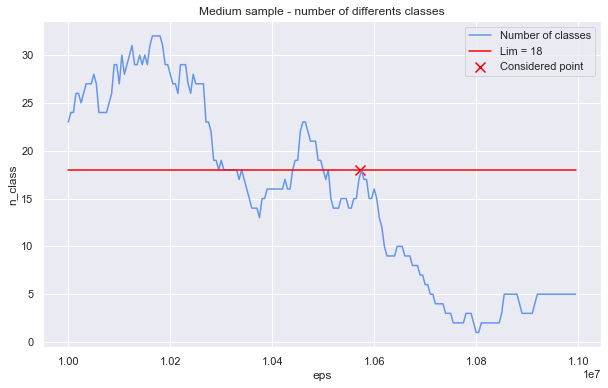

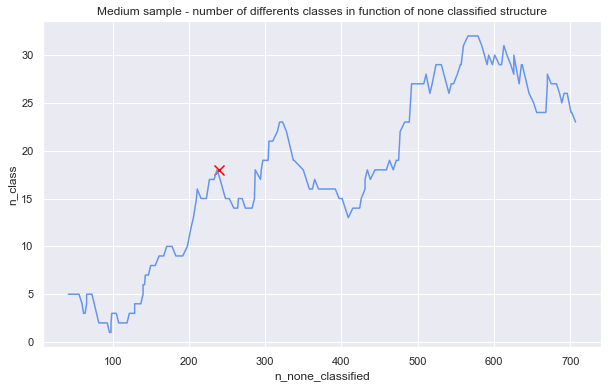

In [32]:
fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_cut,alone_y_cut, label='Non classified structure', c = 'cornflowerblue')
plt.plot(lim_med1,alone_y_cut, label='Lim = 1.057 e7', c = 'red')
plt.title('Medium sample - Number of none classified structure')
plt.xlabel('eps')
plt.ylabel('n_none_classified')
plt.legend()
fig.savefig("Med_none.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_cut,nclass_y_cut, label='Number of classes', c = 'cornflowerblue')
plt.plot(eps_x_cut,lim_med2, label='Lim = 18', c = 'red')
plt.scatter(10572000,18, s= 100 ,label='Considered point', marker = 'x' ,c = 'red')
plt.title('Medium sample - number of differents classes')
plt.xlabel('eps')
plt.ylabel('n_class')
plt.legend()
fig.savefig("Med_number.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(alone_y_cut,nclass_y_cut, c = 'cornflowerblue')
plt.title('Medium sample - number of differents classes in function of none classified structure')
plt.scatter(239,18, s= 100 ,label='Considered point', marker = 'x' ,c = 'red')
plt.xlabel('n_none_classified')
plt.ylabel('n_class')
fig.savefig("Med_bis.png")
plt.show()

In [33]:
clustering_cut = DBSCAN(eps=10572000, min_samples=2).fit(X_cut) #eps = research radius, min_samples = min number of similar sample
print(clustering_cut.labels_)
#Number of non classified structure and number o different crystalline structure
alone = 0
dif = 0
for i in range (len(clustering_cut.labels_)):
    if (clustering_cut.labels_[i] == -1):
        alone = alone +1
    elif(clustering_cut.labels_[i] > dif ):  
        dif = clustering_cut.labels_[i]
    else:
        pass

print('There is',alone, 'non classified structure')
print('there is', dif + 1, 'different crystaline structure')

[ 0  0  0 -1  0  0  0 -1  0 -1 -1 -1 -1  0 -1  0  1  0 -1 -1 -1  0 -1 -1
  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0 -1  0  0  2  0  0  0  0 -1  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  3 -1 -1 -1  0  0  0 -1  4
 -1  0 -1  0 -1  0  0  0 -1  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0 -1
  5 -1  0  0  0  0 -1  0  0  0 -1  0  0 -1  6  0  0  0  0 -1  0  0  0 -1
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  7 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1 -1  0  0
 -1  0  0  0  0  0  8  0  0  0  0  2  0  0  0  0  0 -1  9  0  0  0 -1 -1
  0  0 -1 -1 -1  0  0 -1 -1 -1  0  0  0 -1  0 -1 -1  0  0  0  0  8 -1 -1
 -1 10 -1  0  0 -1  0 -1 11 -1  3 -1 -1 -1 -1 -1  0  0  0 -1  0 -1  0  0
 -1 -1  0 -1 -1  0  0  0 -1  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0 -1 -1  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0 -1
  0  0  0  0  0  0  0  0 -1  0  0  0 -1 -1  0  0  0

### K-Means

In [34]:
X_kmeans_cut = X_cut
kmeans_cut = KMeans(n_clusters=18, random_state=0, n_init =100).fit(X_kmeans_cut)
kmeans_cut.labels_

array([ 8,  1,  7, 10, 15, 15,  5,  5,  4,  9,  2, 14,  9,  1,  6,  5, 12,
        3,  6,  0, 11, 16,  9, 16, 12, 17,  2,  9, 11,  5, 16, 11, 17,  2,
       15, 17,  1, 12, 14, 13, 16,  8, 10,  1,  8,  6,  3, 17,  3, 13,  4,
       13,  1,  9,  4, 13,  1, 10, 13,  4, 14,  4,  3, 10, 15,  9,  3,  3,
        0,  4,  5,  6,  9, 13, 15, 16, 17,  4, 12, 17,  8,  5, 13,  9,  0,
        3,  8,  8,  3, 10, 17,  3,  1,  4, 14,  6, 12,  2, 10,  4,  8,  0,
       16,  5, 13,  3, 10, 13,  2,  5, 16, 15,  3,  4,  3,  8,  2,  1, 12,
       17, 15,  5, 15, 12, 16,  7,  8,  8,  2,  4,  2, 10, 14,  3,  7, 11,
        4,  1,  3,  4,  4,  7,  8,  0, 10,  6, 17,  4,  2, 16, 11, 15,  7,
        7,  8,  2,  1, 12, 17, 14, 11, 15,  8, 13,  3, 10,  1,  5,  6,  4,
       16, 14,  4,  8,  9,  7, 17,  4,  4, 10,  5,  5, 13,  1,  1,  0, 16,
       13,  5,  4, 17,  8,  5, 14, 14,  7,  0, 14,  4,  6,  6, 10, 15,  1,
        3,  9, 14,  9, 16,  4,  1,  1,  3,  9,  3, 17,  3, 16, 15, 14, 13,
       17, 12,  6,  9, 10

### Number of each class

In [35]:
DB_tot = get_repartition_24_DB(clustering_cut.labels_)
KM_tot = get_repartition_24_KM(kmeans_cut.labels_)
DB_tot = class_adapt(DB_tot)
KM_tot = class_adapt(KM_tot )

In [36]:
x1_med=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
x2_med=['no class','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']

[239. 519.   2.   2.   2.   9.   2.   3.   2.   2.   2.   2.   2.   2.
   2.   2.   2.   2.   2.]


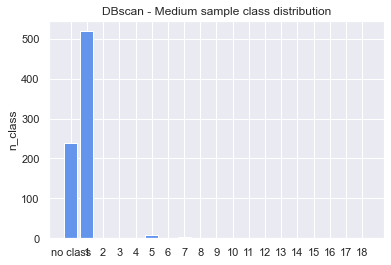

[42. 43. 45. 64. 64. 35. 32. 33. 58. 34. 48. 18. 42. 49. 47. 51. 41. 54.]


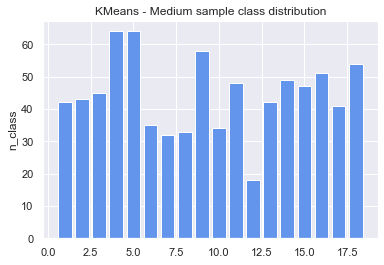

In [37]:

print(DB_tot)
fig = plt.figure()
plt.title('DBscan - Medium sample class distribution')
plt.bar(x2_med,DB_tot, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_med_bar.png")
plt.show()


print(KM_tot)
fig = plt.figure()
plt.title('KMeans - Medium sample class distribution')
plt.bar(x1_med,KM_tot, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_med_bar.png")
plt.show()

### K-Means test different number of class

# Small sample

pickle.dump(DB_mini_final, open( "DB_mini_tot_fin", "wb" ) )

In [38]:
DB_mini_final = pickle.load( open( "DB_mini_tot_fin", "rb" ) )

In [39]:
print(len(DB_mini_final))

640


## DBscan test

In this part the goal is to find the rigth number of classes.

In [40]:
X_min = DB_mini_final

alone_y_min =[]
nclass_y_min =[]
eps_x_min = []

for j in range (200):
    clustering_min = DBSCAN(eps=2900000+j*2000, min_samples=2).fit(X_min) #eps = research radius, min_samples = min number of similar sample
    alone_min = 0
    dif_min = 0
    for i in range (len(clustering_min.labels_)):
        if (clustering_min.labels_[i] == -1):
            alone_min = alone_min +1
        elif(clustering_min.labels_[i] > dif_min ):  
            dif_min = clustering_min.labels_[i]
        else:
            pass
    alone_y_min = np.append(alone_y_min, alone_min)
    nclass_y_min = np.append(nclass_y_min, dif_min +1)
    eps_x_min = np.append(eps_x_min, 2900000+j*2000)

In [41]:
lim_min1 = np.ones(len(eps_x_min))*3192000
lim_min2 = np.ones(len(eps_x_min))*24

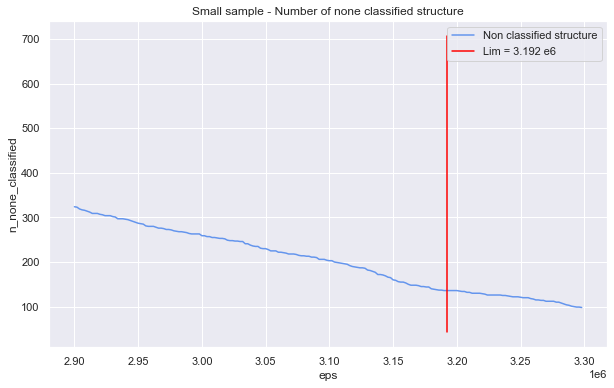

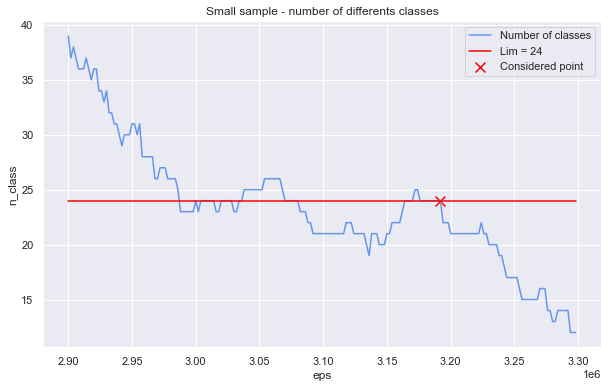

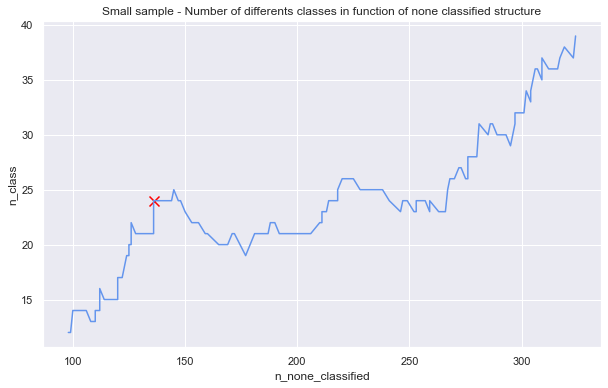

In [42]:
fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_min,alone_y_min, label='Non classified structure', c = 'cornflowerblue')
plt.plot(lim_min1,alone_y_cut, label='Lim = 3.192 e6', c = 'red')
plt.title('Small sample - Number of none classified structure')
plt.xlabel('eps')
plt.ylabel('n_none_classified')
plt.legend()
fig.savefig("Small_none.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(eps_x_min,nclass_y_min, label='Number of classes', c = 'cornflowerblue')
plt.plot(eps_x_min,lim_min2, label='Lim = 24', c = 'red')
plt.scatter(3192000,24, s=100, marker ='x', c='red', label = 'Considered point')
plt.title('Small sample - number of differents classes')
plt.xlabel('eps')
plt.ylabel('n_class')
plt.legend()
fig.savefig("Small_number.png")
plt.show()

fig = plt.figure(figsize = (10,6))
plt.plot(alone_y_min,nclass_y_min, c = 'cornflowerblue')
plt.title('Small sample - Number of differents classes in function of none classified structure')
plt.scatter(136,24, s=100, marker ='x', c='red', label = 'Considered point')
plt.xlabel('n_none_classified')
plt.ylabel('n_class')
fig.savefig("Small_bis.png")
plt.show()

In [43]:
clustering_min = DBSCAN(eps=3192000, min_samples=2).fit(X_min) #eps = research radius, min_samples = min number of similar sample
print(clustering_min.labels_)
#Number of non classified structure and number o different crystalline structure
alone = 0
dif = 0
for i in range (len(clustering_min.labels_)):
    if (clustering_min.labels_[i] == -1):
        alone = alone +1
    elif(clustering_min.labels_[i] > dif ):  
        dif = clustering_min.labels_[i]
    else:
        pass

print('There is',alone, 'non classified structure')
print('there is', dif + 1, 'different crystaline structure')

[-1  0  0  1  2  0  0  2 -1 -1  0  0  2  0  0  2 -1  0  0  0  2  3  0  2
 -1  0  0  0  2 -1  0  2 -1  0  0  0  2  0  0  2 -1  4  0  0  2  0  5  2
 -1  0  0 -1  2  0  0  2 -1  0  6  0  2  0  0  2 -1  0  3  0  2 -1 -1  2
 -1  0  1  7  2 -1  0  2  0  0  3  0 -1  0  0  0  0  0  0  0 -1  0  0 -1
  0  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  3  0  0 -1  0  0 -1  0  0  8  0
 -1  0 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  9  0 -1 -1  0
  0 10 -1 -1  0 11  0  0  0  0  0 12 -1  0  0  0 -1  0 -1 13  0  0  0  0
  0  0 -1 -1  0  0  0 -1  0 -1 11  0  0 -1 14 15 -1  0 16  3 -1  0  0  0
  0 -1 -1 -1  0 -1  3  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0 13  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0 -1  0  0 -1 -1  0
  8  0  0  0 -1  0  0  0  0 -1  0  0  3  0 -1  0 -1 14  3 12  0  0  0  9
 -1 17  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 17  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 18  0  0 19 -1  0 -1 -1  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  2  0  0 -1  0

## K-means

In [44]:
X_kmeans_small = X_min
kmeans_small = KMeans(n_clusters=24, random_state=0, n_init =100).fit(X_kmeans_small)
kmeans_small.labels_

array([23,  5,  1, 12,  3, 11, 18,  3, 23, 16, 10,  1,  3, 15, 14,  3,  7,
        9, 10, 15,  3, 20,  4,  3,  7,  5,  4,  5,  3, 11, 17,  3, 23,  4,
       18,  9,  3, 19,  0,  3, 23,  2, 15, 10,  3,  0,  2,  3,  7, 15, 18,
       22,  3, 16,  0,  3,  7, 15,  2, 13,  3,  4, 16,  3,  7,  0, 20,  0,
        3, 21,  8,  3,  7,  5, 12, 12,  3, 12, 11,  3, 17,  1, 20,  5, 19,
       16,  5,  1, 11,  2, 13, 14, 22, 17, 19, 22, 16,  6, 11,  1,  4,  5,
        6,  5, 18,  8, 12, 19, 15, 20, 19,  5,  6, 15,  4,  8,  1, 18, 12,
        5, 22,  5, 14,  1,  5,  6, 15,  9, 15, 16, 14,  0,  5, 11,  9, 18,
       16,  1, 19,  0, 13,  2, 19, 18, 11,  8, 19,  8, 18, 11, 11,  0,  0,
        4, 10,  8,  8,  5,  4, 15,  8, 11, 19, 12,  6, 15, 10,  5, 17, 11,
        2, 22, 18, 14,  5, 13,  9, 12, 11, 17,  1, 21, 12, 19, 12, 15, 19,
       20,  8, 18,  4,  9,  9, 18,  8, 12, 15, 22, 20, 10, 16, 13,  9,  1,
       11, 15,  0,  8, 18,  5, 19,  1, 16, 17,  5, 15,  5, 12,  5, 11,  1,
       18, 11, 14,  0,  5

## Comparison of DBscan and K-Means class repartition

### Number of each class

In [45]:
DB_tot = get_repartition_24_DB(clustering_min.labels_)
KM_tot = get_repartition_24_KM(kmeans_small.labels_)

In [46]:
x1_small=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
x2_small=['no class','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']

[136. 411.   3.  30.  10.   2.   3.   2.   3.   4.   2.   2.   2.   2.
   2.   3.   5.   2.   2.   3.   2.   3.   2.   2.   2.]


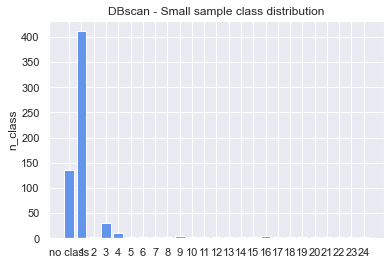

[28. 34. 32. 30. 26. 62. 16.  6. 30. 37. 19. 43. 34. 23. 17. 41. 28. 19.
 39. 29. 14.  9. 20.  4.]


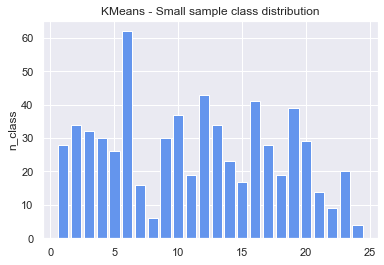

In [47]:

print(DB_tot)
fig = plt.figure()
plt.title('DBscan - Small sample class distribution')
plt.bar(x2_small,DB_tot, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_small_bar.png")
plt.show()


print(KM_tot)
fig = plt.figure()
plt.title('KMeans - Small sample class distribution')
plt.bar(x1_small,KM_tot, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_small_bar.png")
plt.show()

## Find tendencies of classes location

In this last part, the goal is to find tendencies of class distribution for small samples based on their location inside the large sample. Locations are cut into four main locations: The corners, the center, the edges, and the rest that are assimilated to the center of each face.

#### DBscan

In [48]:
DB_CE, DB_CO, DB_E, DB_O = get_class_repartition(clustering_min.labels_)

KM_CE, KM_CO, KM_E, KM_O = get_class_repartition(kmeans_small.labels_)

In [49]:
DB_CE_rep = get_repartition_24_DB(DB_CE)
DB_CO_rep = get_repartition_24_DB(DB_CO)
DB_E_rep = get_repartition_24_DB(DB_E)
DB_O_rep = get_repartition_24_DB(DB_O)

KM_CE_rep = get_repartition_24_KM(KM_CE)
KM_CO_rep = get_repartition_24_KM(KM_CO)
KM_E_rep = get_repartition_24_KM(KM_E)
KM_O_rep = get_repartition_24_KM(KM_O)

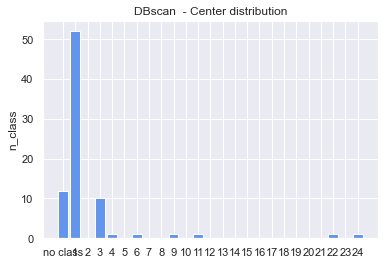

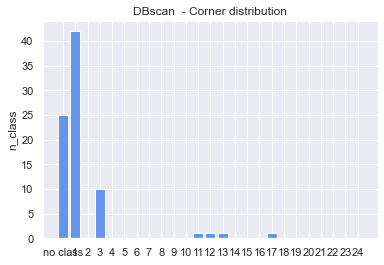

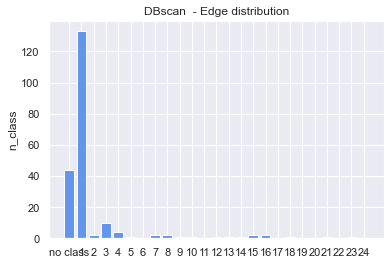

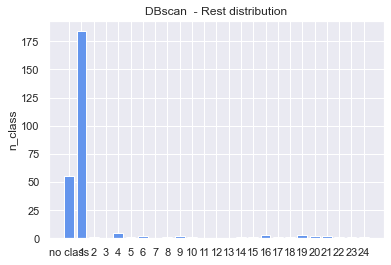

In [50]:
fig = plt.figure()
plt.title('DBscan  - Center distribution')
plt.bar(x2_small,DB_CE_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_Center_bar.png")
plt.show()

fig = plt.figure()
plt.title('DBscan  - Corner distribution')
plt.bar(x2_small,DB_CO_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_Corner_bar.png")
plt.show()

fig = plt.figure()
plt.title('DBscan  - Edge distribution')
plt.bar(x2_small,DB_E_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_Edge_bar.png")
plt.show()

fig = plt.figure()
plt.title('DBscan  - Rest distribution')
plt.bar(x2_small,DB_O_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("DB_Outer_bar.png")
plt.show()

#### K-Means

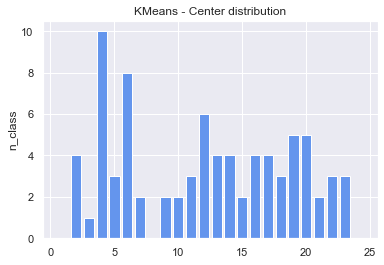

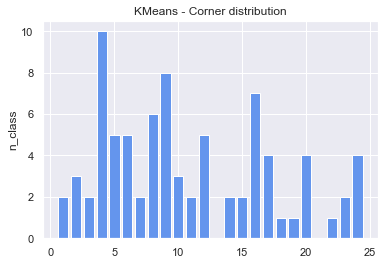

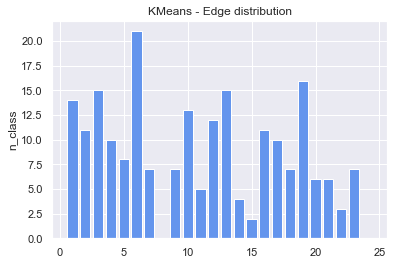

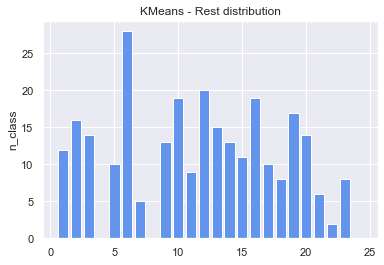

In [51]:
fig = plt.figure()
plt.title('KMeans - Center distribution')
plt.bar(x1_small,KM_CE_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_Center_bar.png")
plt.show()

fig = plt.figure()
plt.title('KMeans - Corner distribution')
plt.bar(x1_small,KM_CO_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_Corner_bar.png")
plt.show()

fig = plt.figure()
plt.title('KMeans - Edge distribution')
plt.bar(x1_small,KM_E_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_Edge_bar.png")
plt.show()

fig = plt.figure()
plt.title('KMeans - Rest distribution')
plt.bar(x1_small,KM_O_rep, color = 'cornflowerblue')
plt.ylabel('n_class')
fig.savefig("Kmeans_Outer_bar.png")
plt.show()